In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable  # HW: rewrite so that this is not needed
import torch.optim as optim

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
class Net(nn.Module):  # HW: understand everything in this cell 100%, search for documentation
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(50, 50)
        self.relu1 = nn.ReLU()
        self.dout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(50, 100)
        self.prelu = nn.PReLU(1)
        self.out = nn.Linear(100, 1)
        self.out_act = nn.Sigmoid()
        
    def forward(self, input_):
        a1 = self.fc1(input_)
        h1 = self.relu1(a1)
        #dout = self.dout(h1)
        a2 = self.fc2(h1)
        h2 = self.prelu(a2)
        a3 = self.out(h2)
        y = self.out_act(a3)
        return y
    
net = Net()
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.BCELoss()

In [2]:
X1 = torch.randn(1000, 50)
X2 = torch.randn(1000, 50) + 1.5
X = torch.cat([X1, X2], dim=0)  # HW: rewrite so that X1 and X2 are not defined above, same down at Y
Y1 = torch.zeros(1000, 1)
Y2 = torch.ones(1000, 1)
Y = torch.cat([Y1, Y2], dim=0)

print(X.size())
print(Y.size())

torch.Size([2000, 50])
torch.Size([2000, 1])


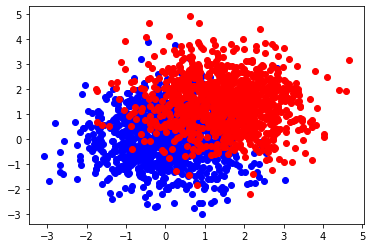

In [3]:
plt.scatter(X1[:, 0], X1[:, 1], color='b')
plt.scatter(X2[:, 0], X2[:, 1], color='r')

In [32]:
X.shape

torch.Size([2000, 50])

In [31]:
net(X[:7])  # HW: this works but there is a problem, would you find it? If not, that's ok

tensor([[0.5239],
        [0.5510],
        [0.5188],
        [0.5050],
        [0.5385],
        [0.5074],
        [0.5233]], grad_fn=<SigmoidBackward>)

In [82]:
def train_epoch(model, opt, criterion, batch_size=50):  # HW: undestand fully what is happening in each step
    model.train()
    losses = []
    for beg_i in range(0, X.size(0), batch_size):
        x_batch = X[beg_i:beg_i + batch_size, :]
        y_batch = Y[beg_i:beg_i + batch_size, :]
        x_batch = Variable(x_batch)  # HW: rewrite this without Variable (I have no idea what is that)
        y_batch = Variable(y_batch)

        opt.zero_grad()
        # (1) Forward
        y_hat = net(x_batch)
        # (2) Compute diff
        loss = criterion(y_hat, y_batch)
        # (3) Compute gradients
        loss.backward()
        # (4) update weights
        opt.step()        
        losses.append(loss.data.numpy())  # HW: check other tutorials if this can be done homehow else (not important much)
    return losses

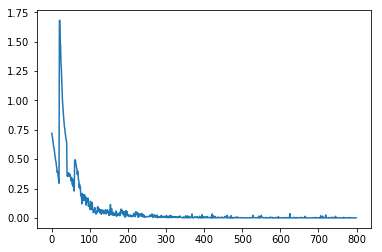

In [83]:
e_losses = []
num_epochs = 20
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion)  # HW: simplify into one line
plt.plot(e_losses)

In [85]:
x_t = Variable(torch.randn(1, 50))  # HW: make that output nicer and without the Variable
net.eval()
print(net(x_t))
x_1_t = Variable(torch.randn(1, 50) + 1.5)
print(net(x_1_t))

Variable containing:
1.00000e-06 *
  6.6610
[torch.FloatTensor of size (1,1)]

Variable containing:
 1.0000
[torch.FloatTensor of size (1,1)]

